<a href="https://colab.research.google.com/github/GairikBaidya/Hand-Gesture-Detection-/blob/main/Copy_of_projectSem6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip drive/My\ Drive/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [ ]:
import numpy as np # We'll be storing our data as numpy arrays
import os # For handling directories
from PIL import Image # For handling the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Plotting

In [ ]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('/content/leapgestrecog/leapGestRecog/00/'): #/content/leapgestrecog/leapGestRecog/00/
    if not j.startswith('.'): # If running this code locally, this is to
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

{'01_palm': 3,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 9,
 '05_thumb': 4,
 '06_index': 7,
 '07_ok': 6,
 '08_palm_moved': 0,
 '09_c': 8,
 '10_down': 5}

In [ ]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('/content/leapgestrecog/leapGestRecog/0' + str(i) + '/'): #/content/leapgestrecog/leapGestRecog/0'
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('/content/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/'): #/content/leapgestrecog/leapGestRecog/0'
                img = Image.open('/content/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L') #/content/leapgestrecog/leapGestRecog/0'
                                # Read in and convert to greyscale
                img = img.resize((100, 100))
                arr = np.array(img)
                x_data.append(arr)
                count = count + 1
            y_values = np.full((count, 1), lookup[j])
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size

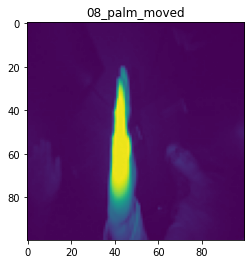

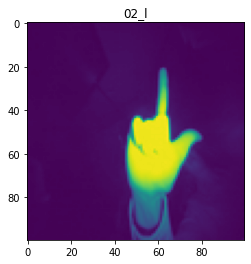

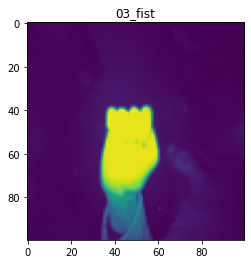

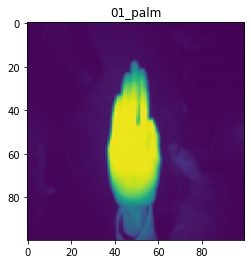

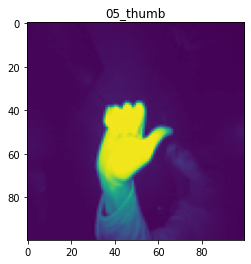

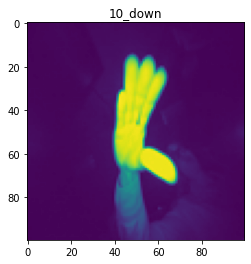

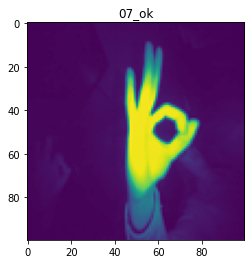

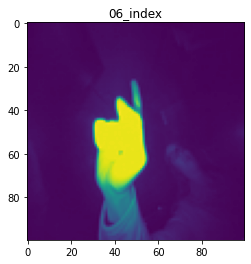

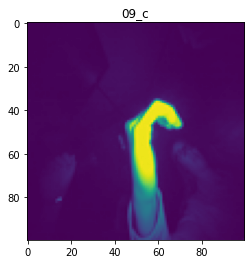

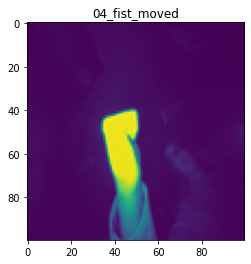

In [ ]:
from random import randint
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical #from tensorflow.keras.utils import to_categorical
y_data = to_categorical(y_data)

In [ ]:
x_data = x_data.reshape((datacount, 100, 100, 1))
x_data /= 255

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [ ]:
from keras import layers
from keras import models
import tensorflow as tf

In [ ]:
model=models.Sequential()
model.add(layers.Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(100, 100,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AvgPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#fitting the model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=16, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/5
1000/1000 [==============================] - 195s 194ms/step - loss: 2.3106 - accuracy: 0.0971 - val_loss: 2.3062 - val_accuracy: 0.1060
Epoch 2/5
1000/1000 [==============================] - 191s 191ms/step - loss: 2.3102 - accuracy: 0.0988 - val_loss: 2.3122 - val_accuracy: 0.1065
Epoch 3/5
1000/1000 [==============================] - 189s 189ms/step - loss: 2.3099 - accuracy: 0.0996 - val_loss: 2.3102 - val_accuracy: 0.0905
Epoch 4/5
1000/1000 [==============================] - 189s 189ms/step - loss: 2.3110 - accuracy: 0.1006 - val_loss: 2.3116 - val_accuracy: 0.1075
Epoch 5/5
1000/1000 [==============================] - 195s 195ms/step - loss: 2.3098 - accuracy: 0.1009 - val_loss: 2.3141 - val_accuracy: 0.0905


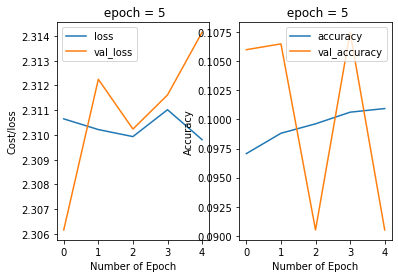

In [ ]:
#size (100,100) epochs 5 , batch-size -32 lr- 0.004
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.subplot(121)
plt.plot(loss)
plt.plot(val_loss)
plt.title(" epoch = 5")
plt.xlabel('Number of Epoch')
plt.ylabel('Cost/loss')
plt.legend(['loss', 'val_loss'])

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(" epoch = 5")
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

In [ ]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

63/63 [==============================] - 6s 93ms/step - loss: 0.0025 - accuracy: 0.9990
Accuracy:0.9990000128746033


Saving WhatsApp Image 2022-07-23 at 7.17.03 PM.jpeg to WhatsApp Image 2022-07-23 at 7.17.03 PM.jpeg
palm


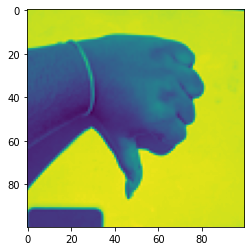

In [ ]:
import tensorflow as tf
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
class_names={0:'palm',1:'I',2:'fist',3:'fist_moved',4:'thumb',5:'index',6:'ok',7:'palm_moved',8:'c',9:'down'}
uploaded = files.upload()
# img1=Image.open("/content/img.jepg").convert('L')
#img3="/content/new1/train/06_index/frame_00_06_0013.png"
# img4="/content/leapGestRecog/00/02_l/frame_00_02_0004.png"
#img2="/content/new1/val/08_palm_moved/frame_00_08_0016.png"
#img5="/content/new1/val/05_thumb/frame_00_05_0016.png"
img = tf.keras.preprocessing.image.load_img("/content/{}".format(list(uploaded.keys())[0]), color_mode = "grayscale" )
size = (100, 100)
img = img.resize(size)
plt.imshow(img)
X=tf.keras.preprocessing.image.img_to_array(img)
X1=np.array([X])
#plt.imshow(image)
predictions=model.predict(X1)
#predictions
print(class_names[np.argmax(predictions)])

In [ ]:
X1.shape

(1600, 1, 1200, 3)

In [ ]:
print(list(uploaded.keys())[0])

WhatsApp Image 2022-05-20 at 9.16.18 PM.jpeg
